In [2]:
import time
import os
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.python.keras.callbacks import TensorBoard
from helper import *
from plot_keras_history import show_history, plot_history
# https://pypi.org/project/plot-keras-history/
# pip install plot-keras-history



Get Data fro classification problem

Binary Classification

In [2]:
from sklearn.datasets import make_circles

n_samples = 3000
X,y = make_circles(n_samples,noise=0.03,random_state = 42)

In [3]:
circles = pd.DataFrame({
    'X0':X[:,0],
    'X1':X[:,1],
    'Lables': y
})

In [4]:
circles

,X0,X1,Lables
0,0.204614,0.744496,1
1,0.240364,-0.972271,0
2,0.231681,0.765188,1
3,0.485038,0.867620,0
4,-0.397572,-0.703067,1
...,...,...,...
2995,0.691894,0.483294,1
2996,-0.112814,-1.007035,0
2997,-0.004573,-1.009240,0
2998,0.686653,-0.770001,0


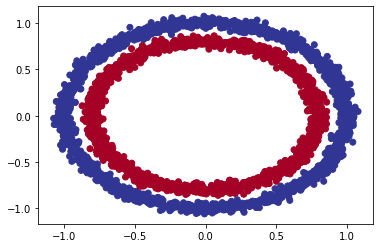

In [5]:
plt.scatter(X[:,0],X[:,1], c = y, cmap=plt.cm.RdYlBu_r)

In [6]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['accuracy'])

model1.fit(X,y,epochs = 10)


Epoch 1/10
94/94 [==============================] - 1s 2ms/step - loss: 3.9255 - accuracy: 0.4673
Epoch 2/10
94/94 [==============================] - 0s 2ms/step - loss: 0.7108 - accuracy: 0.4970
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4913
Epoch 4/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4820
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4777
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4767
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4957
Epoch 8/10
94/94 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4753
Epoch 9/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4670
Epoch 10/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4957


Adding an extra layer to the model

In [7]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

model2.fit(X, y, epochs=200, verbose = 0)

model2.evaluate(X,y)


94/94 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000


[0.693419337272644, 0.5]

Adding more hidden neurons and an extra layer

In [8]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(), # Changing the optimizer
               metrics=['accuracy'])

model3.fit(X, y, epochs=100, verbose=0)

model3.evaluate(X, y)


94/94 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5000


[0.6947672367095947, 0.5]

313/313 [==============================] - 1s 2ms/step
Doing multicalss classification


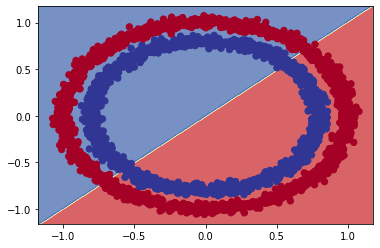

In [9]:
from helper import plot_decision_boundary

plot_decision_boundary(model3,X = X,y = y)

Use the model for a regression problem

In [10]:
# Build a dataset for regression
# tf.random.set_seed(42)

X_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5) # y = X +100

#Split data to train test split
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:] 

model3.fit(tf.expand_dims(X_reg_train, axis = -1),y_reg_train, epochs = 100, verbose =0)


Replicate the model for regression problem

In [11]:

tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model4.compile(loss=tf.keras.losses.mae, # Altering the loss function
               optimizer=tf.keras.optimizers.Adam(), 
               metrics=['mae'])

hist = model4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100,verbose=0)
y_reg_pred = model4.predict(tf.expand_dims(X_reg_test,axis = -1))


2/2 [==============================] - 0s 11ms/step


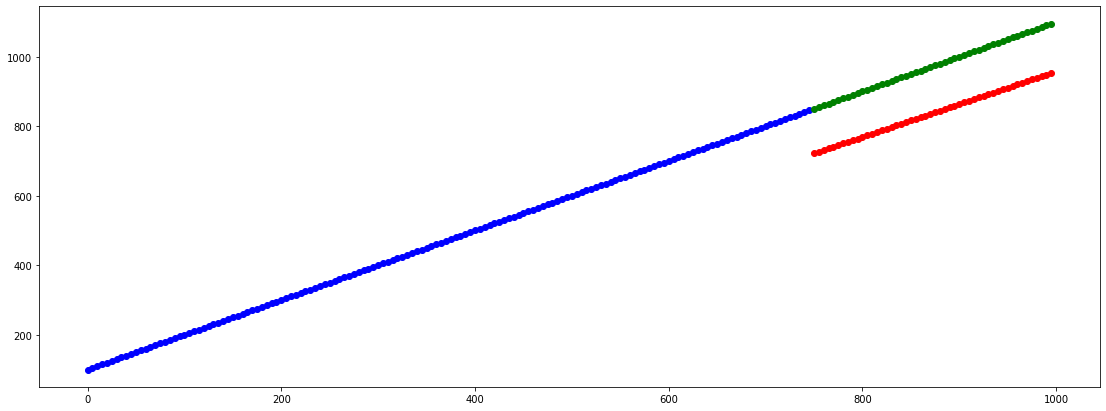

In [12]:

plt.figure(figsize=(19,7))
plt.scatter(X_reg_train,y_reg_train,c = 'b', label = 'Training Data')
plt.scatter(X_reg_test,y_reg_test,c = 'g', label = 'Testing Data')
plt.scatter(X_reg_test,y_reg_pred,c = 'r', label = 'Predictions')


Introducing Non Linearity In Our Model

In [13]:
# NAME = f'Non-Linaerity-Model {int(time.time())}'
# tensorboard = TensorBoard(log_dir=f'logs/{NAME}')
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model5.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
               metrics = ['accuracy']
            )

history = model5.fit(X,y,epochs =100,validation_split=0.33, verbose = 0)

313/313 [==============================] - 0s 1ms/step
Binary Classification


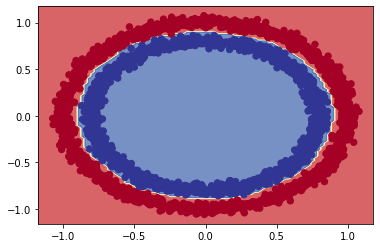

In [14]:
plot_decision_boundary(model5,X,y)

(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

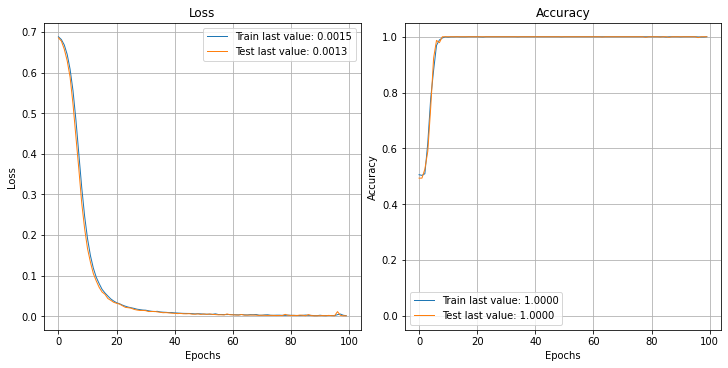

In [15]:
plot_history(history)

Making Sense Of Activation Functions: 
Sigmoid

In [16]:
# Create a linear valued graph
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

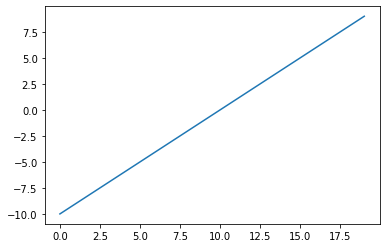

In [17]:
plt.plot(A)

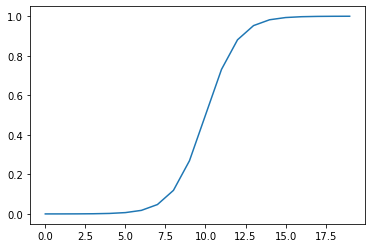

In [18]:
# Using the sigmoid function formula ie sigmoid(x) = 1/(1 + exp(-x))
B = 1/ (1 + tf.exp(-A))
plt.plot(B)

Rectified Linear unit (ReLU)

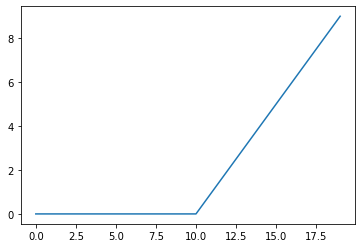

In [19]:
# Relu : max(0,x)

C = tf.math.maximum(0,A)
plt.plot(C)

Improving classification model by creating training and test splits

In [20]:
X_train, y_train = X[:2400], y[:2400]
X_test, y_test = X[2400:], y[2400:]


Recreate the model: Training on train data and evaluating on testing data

In [21]:
# Use tensorboard --logdir=./ in terminal to run ternsorboard
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model6.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
               metrics = ['accuracy']
            )

history6 = model6.fit(X_train,y_train,epochs =25,validation_split=0.33, verbose = 0)

In [22]:
model6.evaluate(X_test,y_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 1.0000


[0.008709101006388664, 1.0]

313/313 [==============================] - 1s 2ms/step
Binary Classification


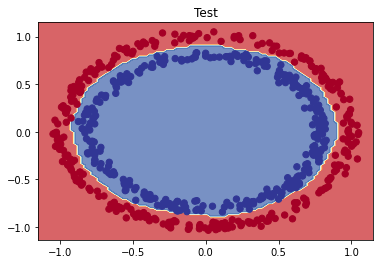

In [23]:
# plt.figure(figsize = (12,7))
# plt.subplot(1,2,1)

# plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model6,X =X_test,y =y_test)

313/313 [==============================] - 1s 2ms/step
Binary Classification


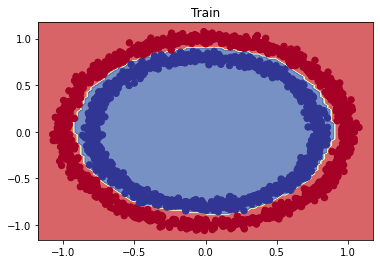

In [24]:
plt.title('Train')
plot_decision_boundary(model6, X = X_train,y =y_train)

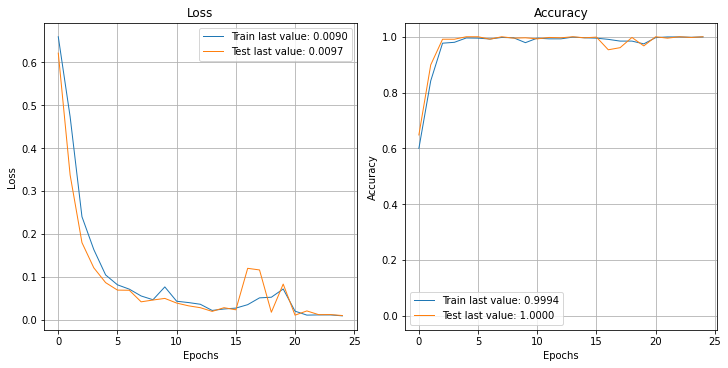

In [25]:
show_history(history6)


Introducing callbacks

In [26]:
tensorboard = save_in_tensorboard('Adding callback to model')
model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model7.compile(loss = 'binary_crossentropy',
               optimizer = 'Adam',
               metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model7.fit(X_train,
                     y_train,
                     epochs = 100,
                    #  callbacks = [lr_scheduler,tensorboard],
                     callbacks = [lr_scheduler],
                     verbose = 0)

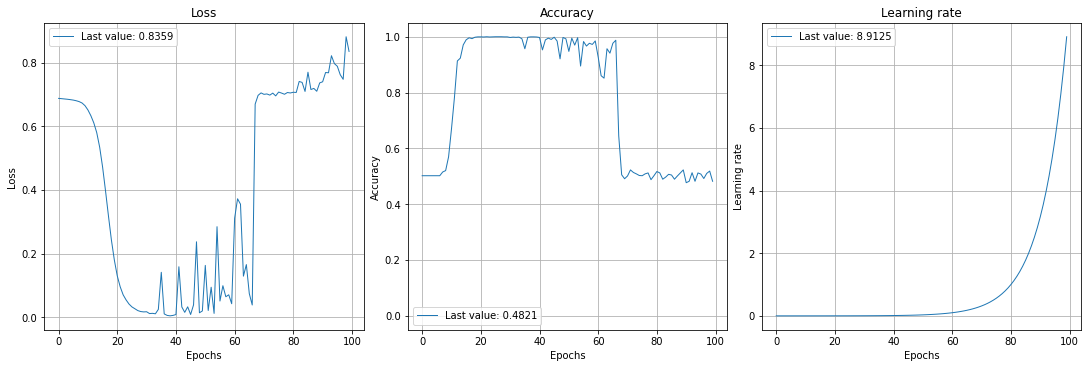

In [27]:
show_history(history)

Text(0.5, 1.0, 'Learnig Rate Vs Loss')

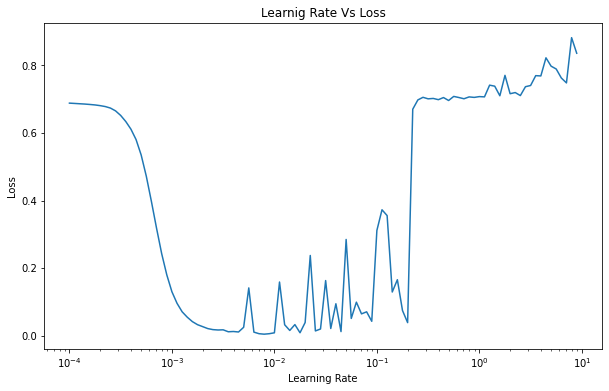

In [28]:
lrs = 1e-4 * 10**(tf.range(100)/20)
plt.figure(figsize=(10,6))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learnig Rate Vs Loss')

313/313 [==============================] - 0s 1ms/step
Binary Classification


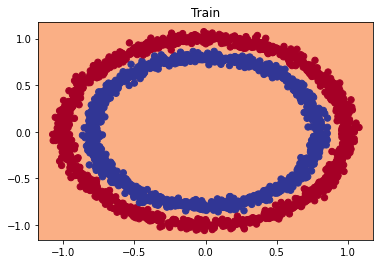

In [29]:
plt.title('Train')
plot_decision_boundary(model7, X=X_train, y=y_train)



313/313 [==============================] - 0s 1ms/step
Binary Classification


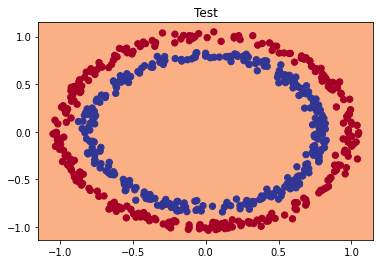

In [30]:
plt.title('Test')
plot_decision_boundary(model7, X=X_test, y=y_test)


In [31]:
# Creating confusion_matrix for the best performing model ie model6
from sklearn.metrics import confusion_matrix

y_preds = model6.predict(X_test)

# Convert the prediction probabilities into binary format
y_preds = tf.round(y_preds)

confusion_matrix(y_test,y_preds)

19/19 [==============================] - 0s 1ms/step


array([[295,   0],
       [  0, 305]], dtype=int64)

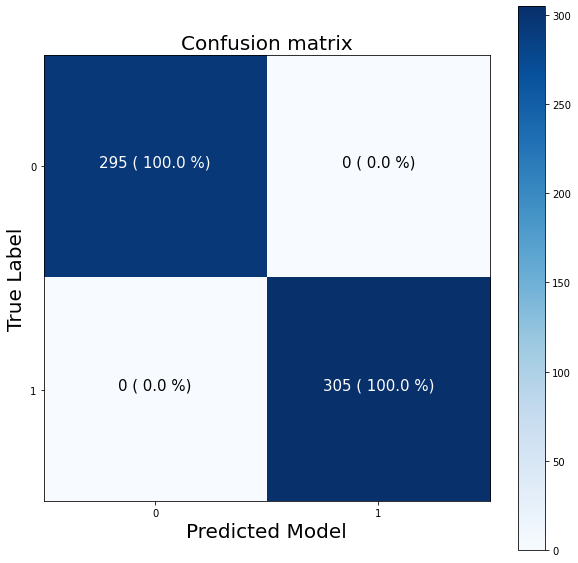

In [32]:
plot_confusion_matrix(y_test,y_preds)

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


In [4]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']


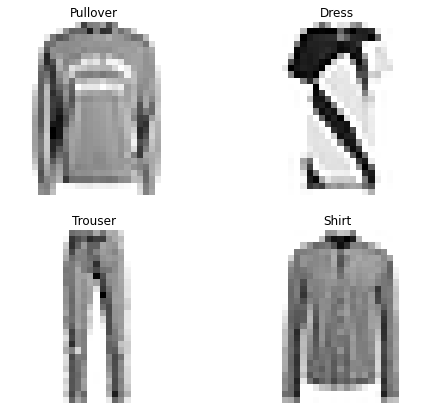

In [5]:
import random 
plt.figure(figsize = (8,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap= plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [21]:


tf.random.set_seed(42)

model8 = tf.keras.Sequential([
    # Adding a flatter layer and specifying the input shape
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model8.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy']
               )

history8 = model8.fit(
    train_data,
    tf.one_hot(train_labels, depth = 10),
    epochs = 10,
    validation_data = (test_data, tf.one_hot(test_labels, depth = 10))
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1748 - accuracy: 0.1602 - val_loss: 1.8170 - val_accuracy: 0.2045
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7134 - accuracy: 0.2479 - val_loss: 1.6598 - val_accuracy: 0.3020
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6381 - accuracy: 0.2869 - val_loss: 1.6119 - val_accuracy: 0.3226
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6102 - accuracy: 0.2987 - val_loss: 1.6076 - val_accuracy: 0.3002
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5952 - accuracy: 0.3098 - val_loss: 1.5825 - val_accuracy: 0.3319
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5843 - accuracy: 0.3176 - val_loss: 1.5708 - val_accuracy: 0.3260
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5751 - accuracy: 0.3212 - val_loss: 1.5843 - val_accuracy:

In [7]:
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [8]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [9]:
train_data_norm.min(),test_data_norm.max()

(0.0, 1.0)

In [11]:
# Traing the same model with normalised data
tf.random.set_seed(42)

model9 = tf.keras.Sequential([
    # Adding a flatter layer and specifying the input shape
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy']
               )

history9 = model9.fit(
    train_data_norm,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10))
)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [14]:
y_pred9 = model9.predict(test_data)

313/313 [==============================] - 0s 1000us/step


(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

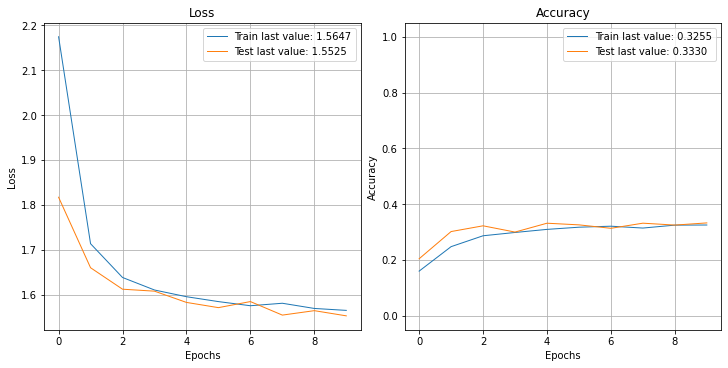

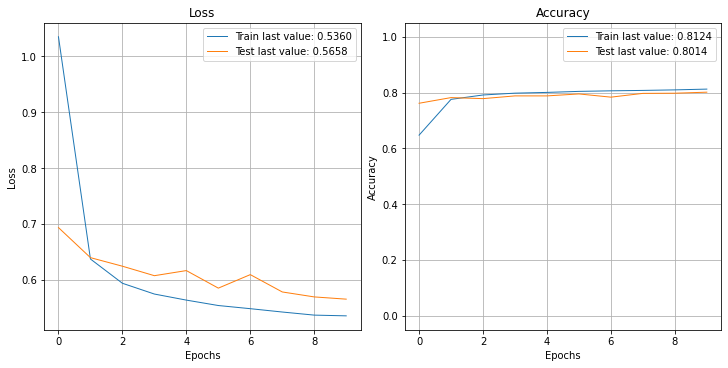

In [24]:
plot_history(history8)
plot_history(history9)

Finding the optimal learning rate

In [25]:
# Traing the same model with normalised data
tf.random.set_seed(42)

model10 = tf.keras.Sequential([
    # Adding a flatter layer and specifying the input shape
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy']
               )
# Create the learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history10 = model10.fit(
    train_data_norm,
    tf.one_hot(train_labels, depth=10),
    epochs=40,
    validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)),
    callbacks = [lr_scheduler]
)


Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

(<Figure size 1080x360 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>,
        <AxesSubplot:title={'center':'Learning rate'}, xlabel='Epochs', ylabel='Learning rate'>],
       dtype=object))

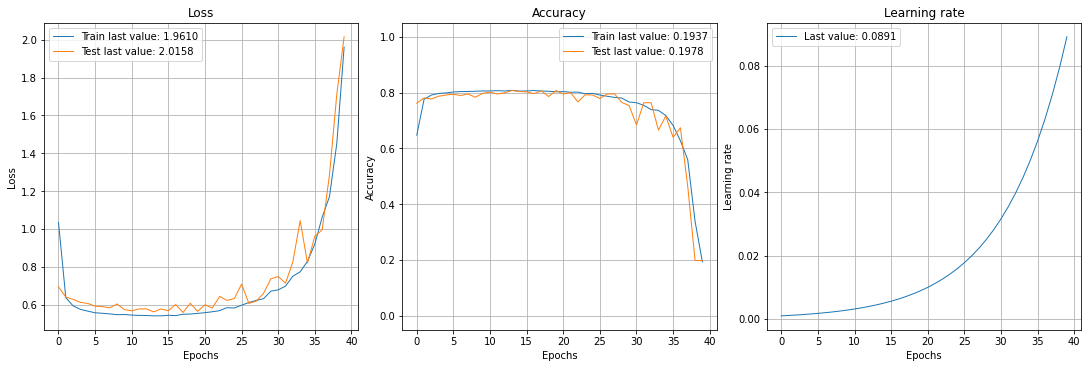

In [26]:
plot_history(history10)

Text(0.5, 1.0, 'Finding the ideal Learning Rate')

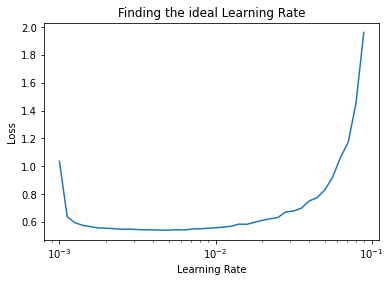

In [27]:
lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs,history10.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss') 
plt.title('Finding the ideal Learning Rate')

The ideal learning rate seems to 10**-3 ie 0.001 which is the default learning rate of Adam Optimizer.

In [32]:
# Train the model with ideal learning rate

# Traing the same model with normalised data
tf.random.set_seed(42)

model11 = tf.keras.Sequential([
    # Adding a flatter layer and specifying the input shape
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr = 0.001),
                metrics=['accuracy']
                )
# Create the learning rate scheduler
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-3 * 10**(epoch/20))

history11 = model11.fit(
    train_data_norm,
    tf.one_hot(train_labels, depth=10),
    epochs=40,
    validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)),
    # callbacks=[lr_scheduler]
)


Epoch 1/40


c:\Users\avirupsaha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

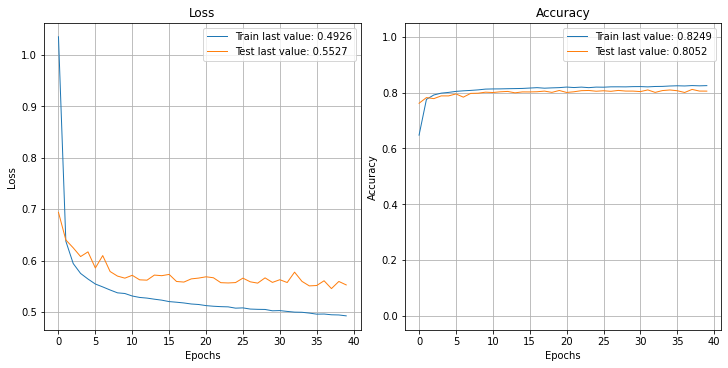

In [33]:
plot_history(history11)

In [35]:
y_probs = model11.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 0s 837us/step


array([[1.88559515e-10, 9.28037092e-11, 1.54221270e-05, 5.43512556e-07,
        1.90046139e-05, 2.89974868e-01, 4.39658834e-08, 4.37865071e-02,
        4.27642558e-03, 6.61927164e-01],
       [1.71898027e-05, 4.01424451e-16, 9.06430602e-01, 7.52757614e-07,
        2.47480068e-02, 3.31019814e-17, 6.83549643e-02, 0.00000000e+00,
        4.48574225e-04, 1.55059058e-15],
       [4.26857732e-05, 9.98512089e-01, 1.03741954e-07, 1.42264005e-03,
        1.52337016e-05, 5.98837818e-22, 7.23614903e-06, 1.13188483e-16,
        5.22519628e-08, 5.68313669e-12],
       [4.19824064e-05, 9.96583521e-01, 7.01626107e-07, 3.23514594e-03,
        1.18153243e-04, 1.89910277e-19, 2.00106133e-05, 4.73221621e-14,
        6.13755333e-07, 1.09745024e-09],
       [1.48491800e-01, 2.43519889e-06, 1.32606596e-01, 1.02353198e-02,
        3.30782533e-02, 4.14901429e-18, 6.75085485e-01, 2.76240104e-29,
        5.00047056e-04, 1.54118356e-14]], dtype=float32)

In [37]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [36]:
y_probs[0],tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([1.8855952e-10, 9.2803709e-11, 1.5422127e-05, 5.4351256e-07,
        1.9004614e-05, 2.8997487e-01, 4.3965883e-08, 4.3786507e-02,
        4.2764256e-03, 6.6192716e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [38]:
y_preds11 = y_probs.argmax(axis = 1)
y_preds11[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [49]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 15), text_size=15):

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    
    # Label the axes
    ax.set(title="Confusion Matrix",
            xlabel="Predicted label",
            ylabel="True label",
            xticks=np.arange(n_classes), # create enough axis slots for each class
            yticks=np.arange(n_classes), 
            xticklabels=labels, # axes will labeled with class names (if they exist) or ints
            yticklabels=labels)
    
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

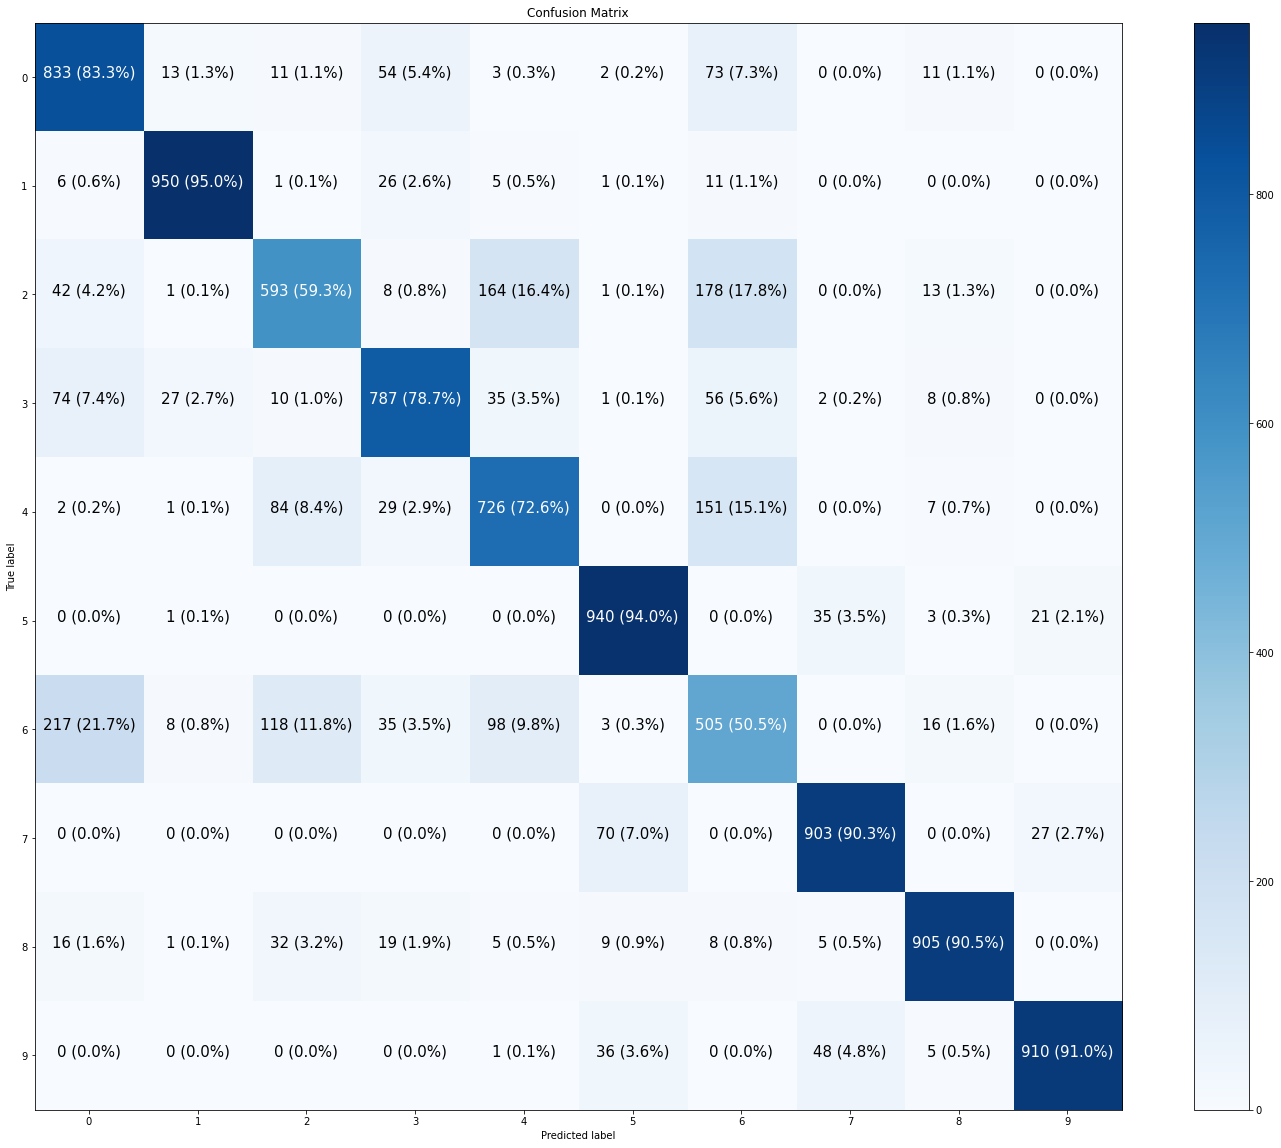

In [58]:
# plt.figure(figsize = (15,15))
make_confusion_matrix(test_labels, y_preds11, figsize = (26,20))    